## Laden der Relevanten Packages, Aufsetzen des Policy-Environments

In [1]:
import pandas as pd
import numpy as np
import copy

from itertools import product

import matplotlib.pyplot as plt

from gettsim import set_up_policy_environment
from gettsim import compute_taxes_and_transfers
from gettsim import plot_dag
from gettsim import grundrente

from pathlib import Path
from gettsim import ROOT_DIR

policy_params, policy_functions = set_up_policy_environment("2020")

In [2]:
functions = "gettsim.grundrente.grundrente"
functions

'gettsim.grundrente.grundrente'

## Erstellung Datensätze: Variation Grundrentenzeiten für verschiedene Entgeltpunkte-Level

In [3]:
data_10 = pd.DataFrame(index=pd.RangeIndex(100))
data_10["hh_id"] = data_10.index
data_10["wohnort_ost"] = False
data_10["entgeltpunkte_grundrente"] = 10
data_10["entgeltpunkte"] = 10
data_10["bruttolohn_m"] = 500
data_10["alter"] = 65
data_10["geburtsjahr"] = 2020 - data_10["alter"]
data_10["grundrentenbewertungszeiten"] = 30*12
data_10["grundrentenzeiten"] = np.linspace(390,430,100)

In [4]:
data_15 = pd.DataFrame(index=pd.RangeIndex(100))
data_15["hh_id"] = data_15.index
data_15["wohnort_ost"] = False
data_15["entgeltpunkte_grundrente"] = 15
data_15["entgeltpunkte"] = 15
data_15["bruttolohn_m"] = 500
data_15["alter"] = 65
data_15["geburtsjahr"] = 2020 - data_15["alter"]
data_15["grundrentenbewertungszeiten"] = 30*12
data_15["grundrentenzeiten"] = np.linspace(390,430,100)

In [5]:
data_20 = pd.DataFrame(index=pd.RangeIndex(100))
data_20["hh_id"] = data_20.index
data_20["wohnort_ost"] = False
data_20["entgeltpunkte_grundrente"] = 20
data_20["entgeltpunkte"] = 20
data_20["bruttolohn_m"] = 500
data_20["alter"] = 65
data_20["geburtsjahr"] = 2020 - data_20["alter"]
data_20["grundrentenbewertungszeiten"] = 30*12
data_20["grundrentenzeiten"] = np.linspace(390,430,100)

In [6]:
data_25 = pd.DataFrame(index=pd.RangeIndex(100))
data_25["hh_id"] = data_25.index
data_25["wohnort_ost"] = False
data_25["entgeltpunkte_grundrente"] = 25
data_25["entgeltpunkte"] = 25
data_25["bruttolohn_m"] =500
data_25["alter"] = 65
data_25["geburtsjahr"] = 2020 - data_25["alter"]
data_25["grundrentenbewertungszeiten"] = 30*12
data_25["grundrentenzeiten"] = np.linspace(390,430,100)
data_25["grundsicherungsgrenze"] = 500 + 432

## Ergebnisse für alle Teil-Datensätze

In [7]:
pd.set_option('display.max_rows', 100)

result10 = compute_taxes_and_transfers(
data = data_10,
params = policy_params,
targets = ["rente_anspr_m", "grundsicherung_im_alter_2020", "grundsicherung", "grundrente1", "anzurechnende_rente", "höchstwert", "durchschnittl_entgeltpunkte_grundrente"],
functions = [policy_functions, functions]
)

result15 = compute_taxes_and_transfers(
data = data_15,
params = policy_params,
targets = ["rente_anspr_m", "grundsicherung_im_alter_2020", "grundsicherung", "grundrente1", "anzurechnende_rente", "höchstwert", "durchschnittl_entgeltpunkte_grundrente"],
functions = [policy_functions, functions]
)


result20 = compute_taxes_and_transfers(
data = data_20,
params = policy_params,
targets = ["rente_anspr_m", "grundsicherung_im_alter_2020", "grundsicherung", "grundrente1", "anzurechnende_rente", "höchstwert", "durchschnittl_entgeltpunkte_grundrente", "grundrente_vor_einkommensanrechnung"],
functions = [policy_functions, functions]
)

result25 = compute_taxes_and_transfers(
data = data_25,
params = policy_params,
targets = ["rente_anspr_m", "grundsicherung_im_alter_2020", "grundsicherung", "grundrente1", "anzurechnende_rente", "höchstwert", "durchschnittl_entgeltpunkte_grundrente"],
functions = [policy_functions, functions]
)

## Organisation der Daten

In [8]:
result10["bruttorente10"] = result10["rente_anspr_m"] + result10["grundrente1"] + data_10["bruttolohn_m"]
result10["Differenz10"] = (result10["höchstwert"] - result10["durchschnittl_entgeltpunkte_grundrente"]).clip(lower=0)

result15["bruttorente15"] = result15["rente_anspr_m"] + result15["grundrente1"] + data_15["bruttolohn_m"]
result15["Differenz15"] = (result15["höchstwert"] - result15["durchschnittl_entgeltpunkte_grundrente"]).clip(lower=0)

result20["bruttorente20"] = result20["rente_anspr_m"] + result20["grundrente1"] + data_20["bruttolohn_m"]
result20["Differenz20"] = (result20["höchstwert"] - result20["durchschnittl_entgeltpunkte_grundrente"]).clip(lower=0)

result25["bruttorente25"] = result25["rente_anspr_m"] + result25["grundrente1"] + data_25["bruttolohn_m"] 
result25["Differenz25"] = (result25["höchstwert"] - result25["durchschnittl_entgeltpunkte_grundrente"]).clip(lower=0)

## Abb.5: Grundrente

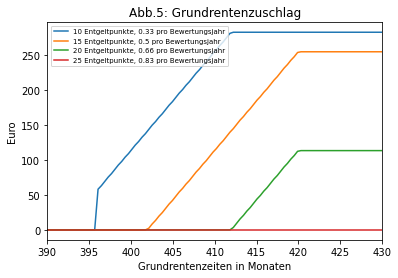

In [9]:
plt.plot(data_10["grundrentenzeiten"], result10["grundrente1"], label="10 Entgeltpunkte, 0.33 pro Bewertungsjahr")
plt.plot(data_15["grundrentenzeiten"], result15["grundrente1"], label="15 Entgeltpunkte, 0.5 pro Bewertungsjahr")
plt.plot(data_20["grundrentenzeiten"], result20["grundrente1"], label="20 Entgeltpunkte, 0.66 pro Bewertungsjahr")
plt.plot(data_25["grundrentenzeiten"], result25["grundrente1"], label="25 Entgeltpunkte, 0.83 pro Bewertungsjahr")

plt.xlabel("Grundrentenzeiten in Monaten")
plt.ylabel("Euro")
plt.title("Abb.5: Grundrentenzuschlag")

plt.xlim(390, 430)

plt.legend(loc=2, prop={'size': 7})
plt.show();

## Zusatz: Gesamteinkommen der verschiedenen Teildatensätze

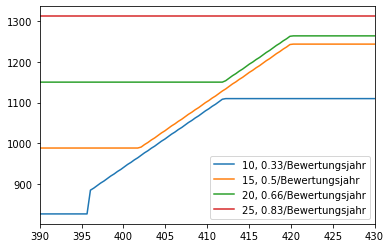

In [10]:
plt.plot(data_10["grundrentenzeiten"], result10["bruttorente10"], label="10, 0.33/Bewertungsjahr")
plt.plot(data_15["grundrentenzeiten"], result15["bruttorente15"], label="15, 0.5/Bewertungsjahr")
plt.plot(data_20["grundrentenzeiten"], result20["bruttorente20"], label="20, 0.66/Bewertungsjahr")
plt.plot(data_25["grundrentenzeiten"], result25["bruttorente25"], label="25, 0.83/Bewertungsjahr")
plt.xlim(390, 430)
plt.legend()
plt.show();

## Zusatz: Differenz zwischen Höchstwert & Entgeltpunkten / Grundrentenbewertungszeiten
- ein Teil der Erklärung der unterschiedlichen Höhe des Grundrentenzuschlags

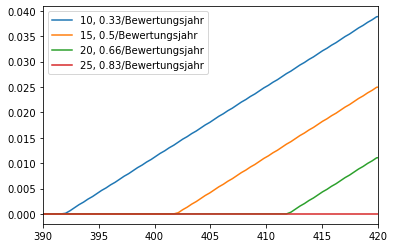

In [11]:
plt.plot(data_10["grundrentenzeiten"], result10["Differenz10"], label="10, 0.33/Bewertungsjahr")
plt.plot(data_15["grundrentenzeiten"], result15["Differenz15"], label="15, 0.5/Bewertungsjahr")
plt.plot(data_20["grundrentenzeiten"], result20["Differenz20"], label="20, 0.66/Bewertungsjahr")
plt.plot(data_25["grundrentenzeiten"], result25["Differenz25"], label="25, 0.83/Bewertungsjahr")
plt.xlim(390, 420)
plt.legend()
plt.show()